# A practical introduction to State of Polarisation (SoP) data analysis

<center>
<img src="https://www.cesnet.cz/img/logo.svg" width="200"> &nbsp;&nbsp;&nbsp;
<img src="https://submerse.eu/wp-content/uploads/2024/02/submerse_logo.png" width="200">
</center>

## Trainers
*   Rudolf Vohnout, CESNET
*   Martin Šlapák, CESNET

# 💡 This Colab notebook: https://1url.cz/@IASPEI-SOP
 Play live, make own copy (google account needed), download as *.ipynb and work in Jupyter locally.

 A backup Jupyter Hub instance: **https://1url.cz/@IASPEI-SOP-BACKUP** for these without google account, without local Jupyter, but with EDUGain identity.

## 👷 Theoretical background and Python/HDF5 intro

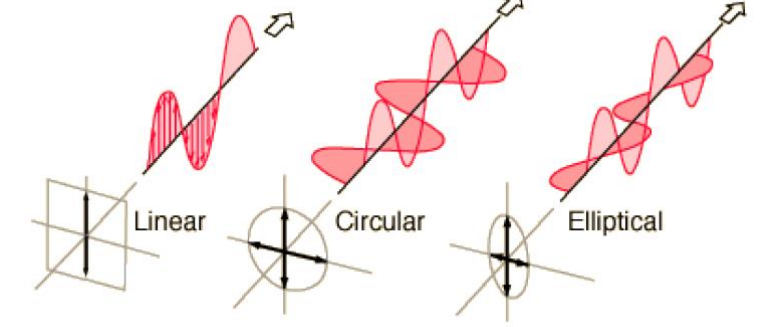

- Polarization of photons in a signal is a (oscilating) electromagnetic field vector (in non-linear environment (fibre)).
- For simplicity we consider only linear polarization (most lasers).
  - Can be controlled using e.g. PBS
  - Can be found in (coherent) modulation schemes as well (adding another degree of freedom) - DP-QPSK.




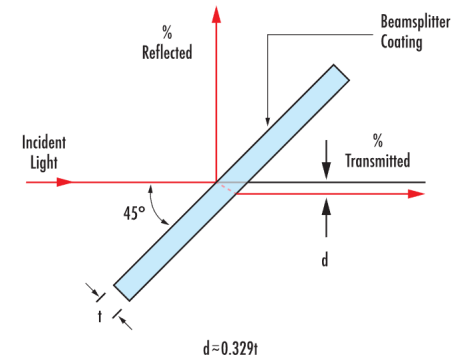

### Stokes parameters
Polarization of light itself is described as Stokes parameters (vectors/matrices):

$$
\begin{pmatrix}
I \\
Q \\
U \\
V
\end{pmatrix}
=
\begin{pmatrix}
\text{intensity} \\
I_{0^\circ} - I_{90^\circ} \\
I_{45^\circ} - I_{135^\circ} \\
I_{\text{RCP}} - I_{\text{LCP}}
\end{pmatrix}
=
\begin{pmatrix}
\text{the sum of any pair}\\
\leftrightarrow - \updownarrow \\
\nwarrow\mkern-18.75mu\searrow - \nearrow\mkern-18.75mu\swarrow \\
\circlearrowright - \circlearrowleft
\end{pmatrix}
$$
Example: Stokes for vertical polarization when intensity == 1

$$
\begin{pmatrix}
I \\
Q \\
U \\
V
\end{pmatrix}
=
\begin{pmatrix}
\text{intensity} \\
I_{0^\circ} - I_{90^\circ} \\
I_{45^\circ} - I_{135^\circ} \\
I_{\text{RCP}} - I_{\text{LCP}}
\end{pmatrix}
=
\begin{pmatrix}
1 \\
0 - 1 \\
0.5 - 0.5 \\
0.5 - 0.5
\end{pmatrix}
=
\begin{pmatrix}
1 \\
-1 \\
0 \\
0
\end{pmatrix}
$$

- To represent polarization changes as vector we use the help of Mueller/Jones matrices.
- Absolute numbers do not matter, changes are important
- For visualisation SoP changes the so-called "Poincare Sphere" is used.
 - However, some papers report that monitoring only one SoP (combined) vector changes is enough $^1$


[1] *Hasan Awad et al. "Seismic detection through state-of-polarization analysis in optical fiber networks,"Proc. SPIE 12835, (12 March 2024); https://doi.org/10.1117/12.3007808*

### Poincare sphere
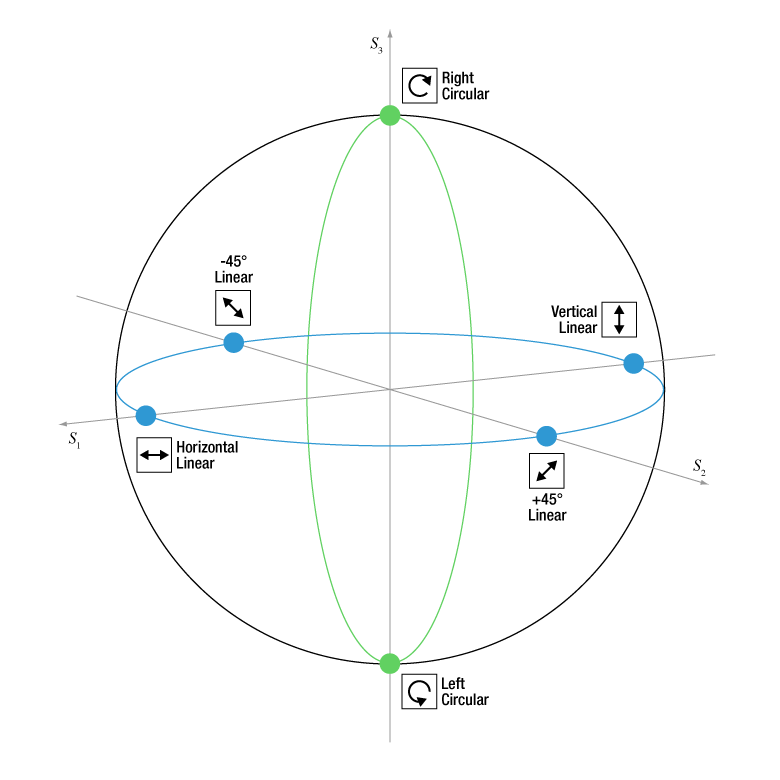
Source: thorlabs.com

- To understand SoP we need to understand (fibre) first!
 - Internal (caused by fibre contruction imperfections).
 - External (cause by external vibrations - mechanical or acoustic).
- The goal is to isolate (learn) internal birefringence.
  - Any deviation from the pre-learned pattern -> (desired) SoP.



- External events can cause slow (e.g. temperature) and fast (e.g. seismic waves) SoP transitions $^2$

[2] *Peter Barcik and Petr Munster, "Measurement of slow and fast polarization transients on a
fiber-optic testbed,"Opt. Express 28, 15250-15257 (2020)*









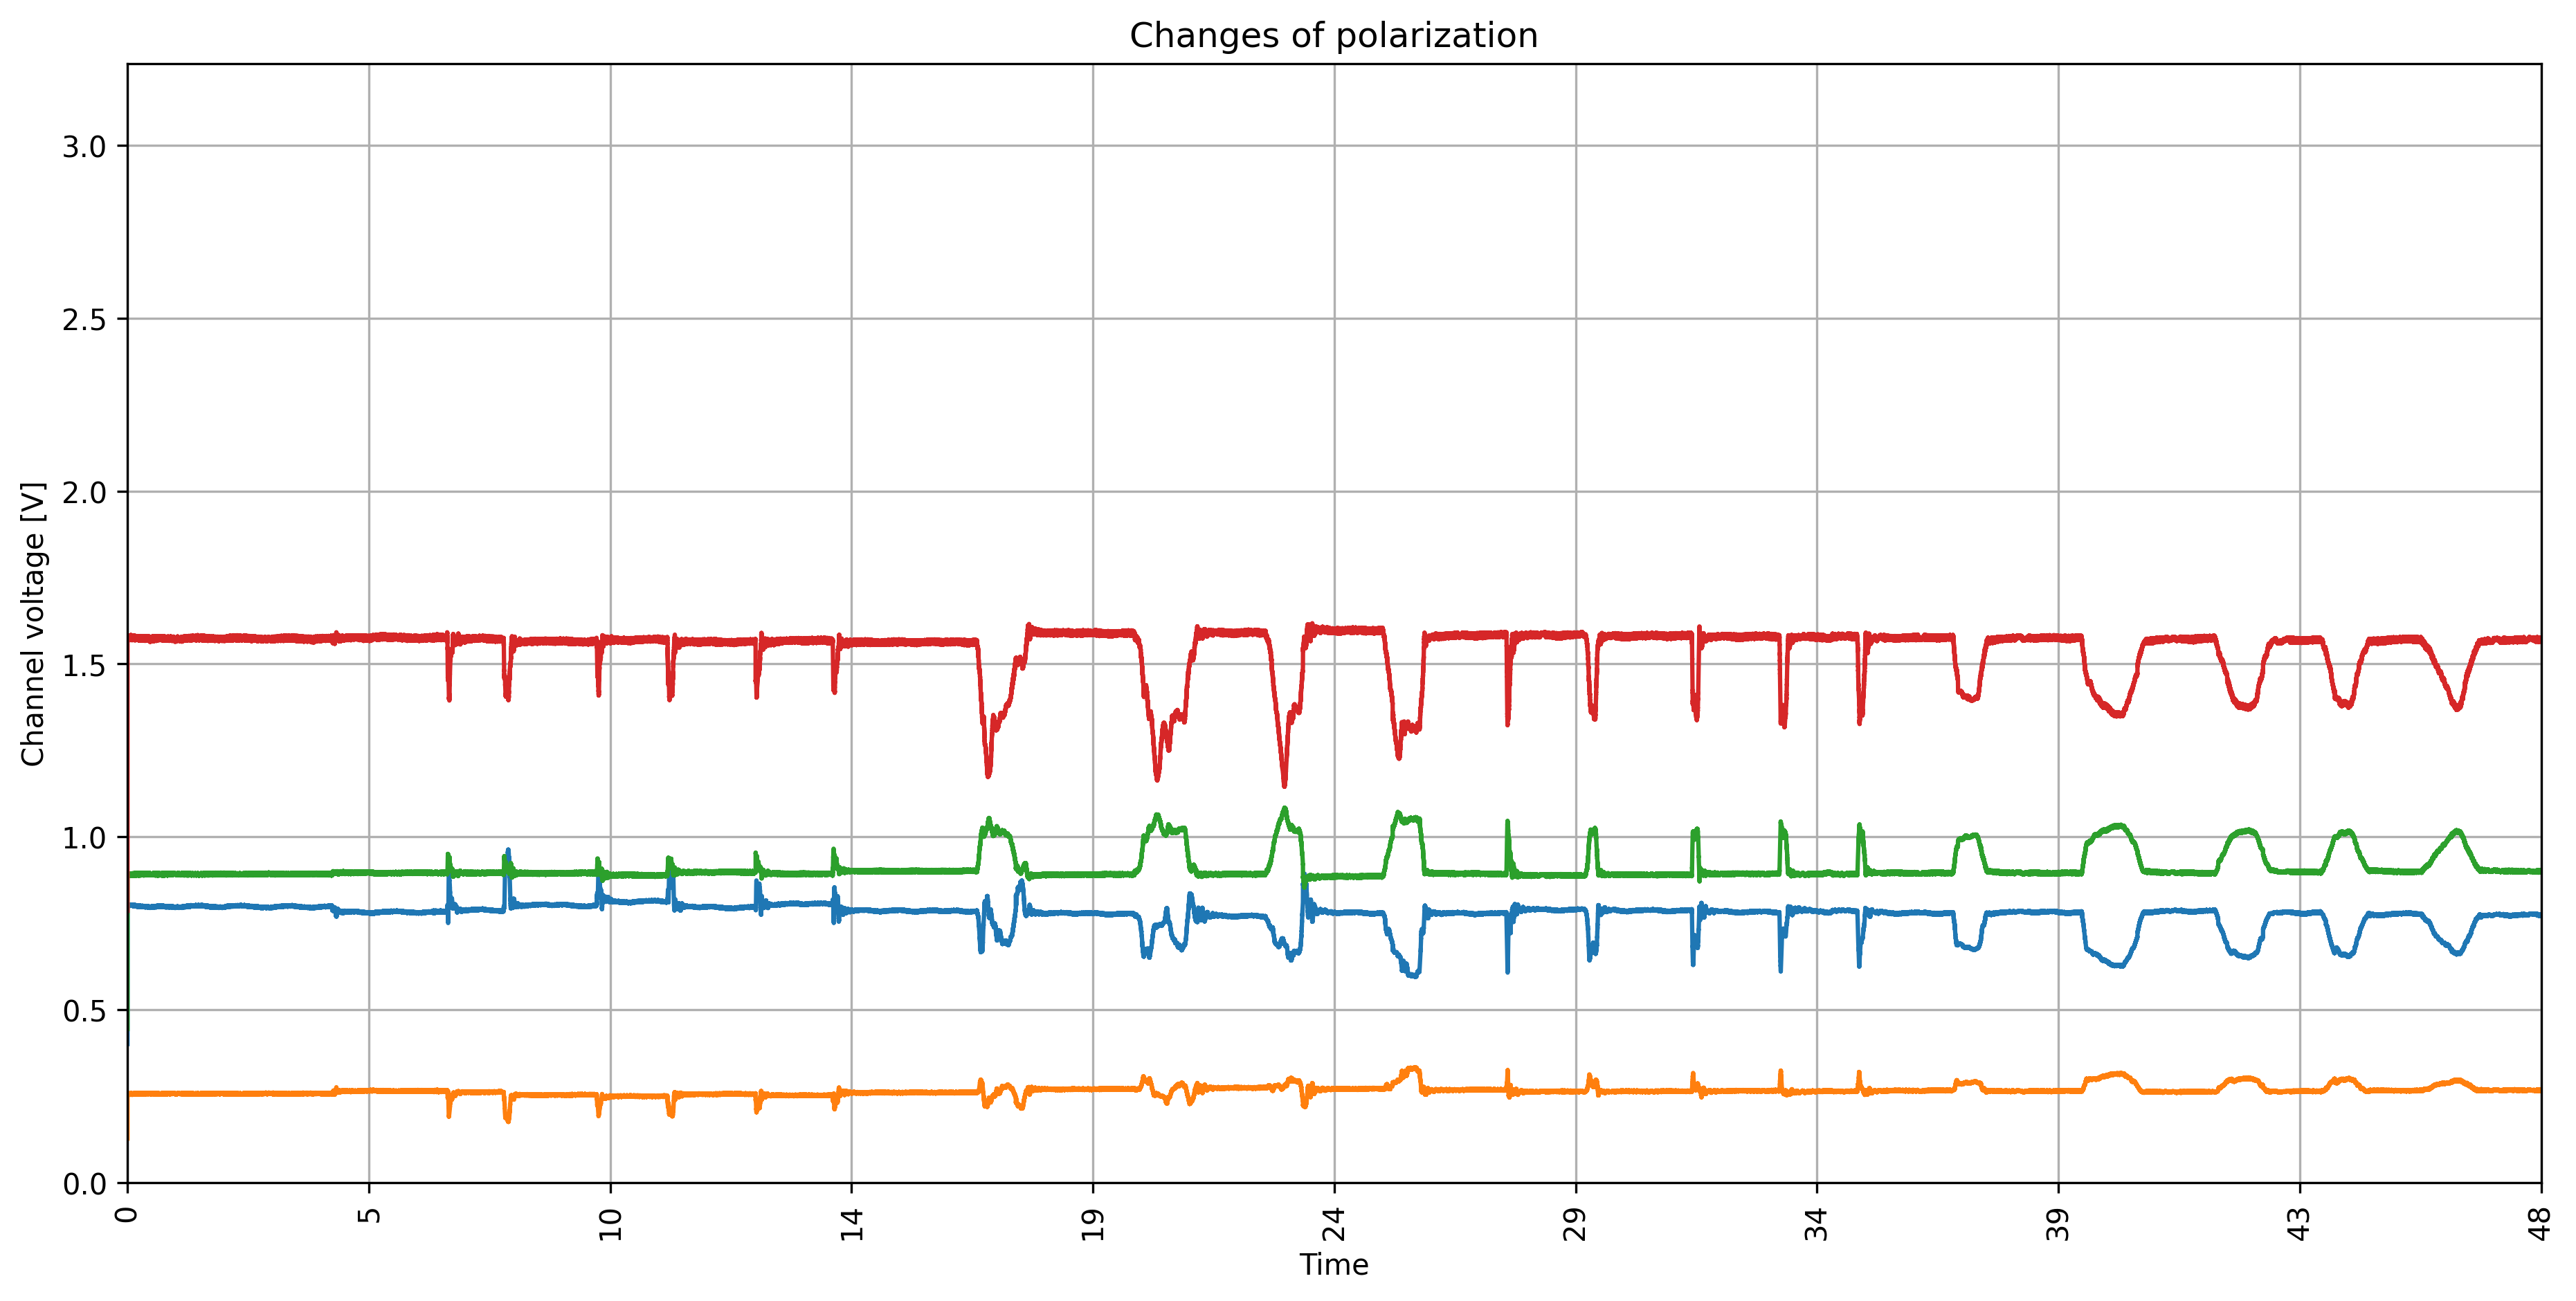

- SoP datasets to be used during this session were captured (interrogated) using dedicated polarimeter:
  - Non calibrated optical fibre sensing device
  - Sensitivity -35 to +5 dBm @ 1520–1610 nm (S, **C**, L bands)
  - Sampling @ 20 kHz, 16-bit, 4 (3+1) channels
  - Generating approx 12GB/day of compressed HDF5 data


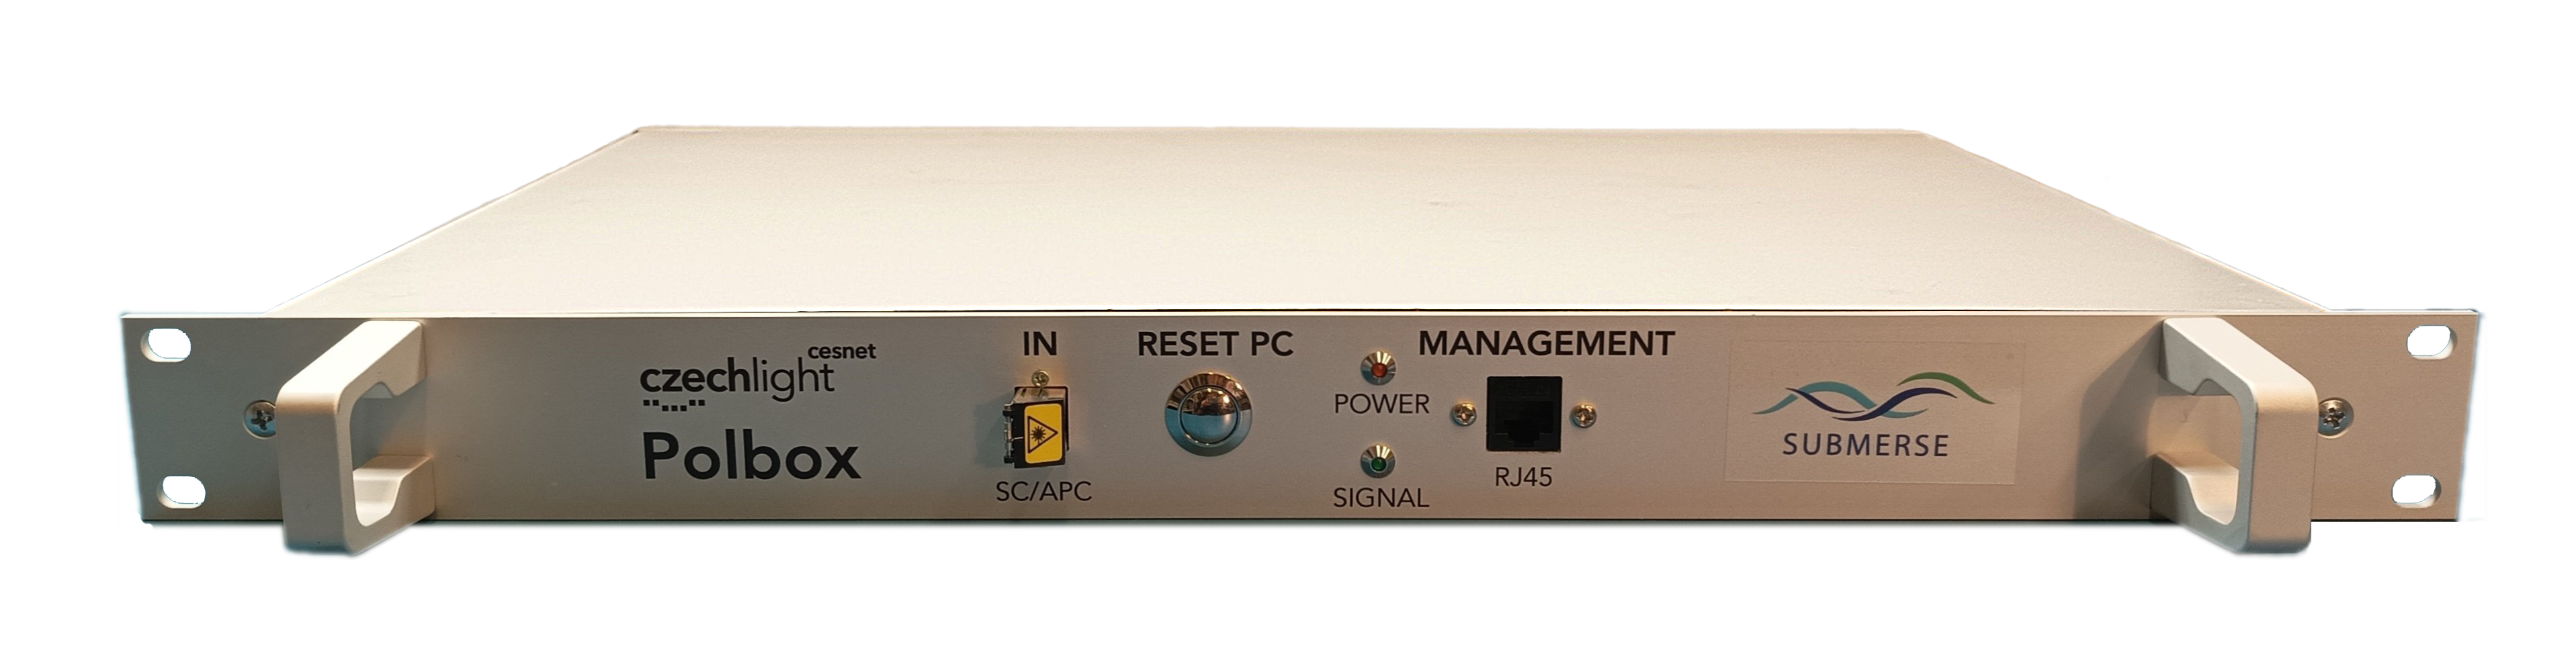

## What is HDF and why to use it?
The Hierarchical Data Format version 5 (HDF5), is an open source file format that supports large, complex, heterogeneous data. HDF5 uses a "file directory" like structure that allows you to organize data within the file in many different structured ways, as you might do with files on your computer. The HDF5 format also allows for embedding of metadata making it self-describing  [[1]](https://www.neonscience.org/resources/learning-hub/tutorials/about-hdf5).

<div>
<center><img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/dev-aten/graphics/HDF5-general/whyHDF5.jpg" width="500"/>
</center>
</div>
<div><center>
<strong>When is HDF5 good to use </strong><a href="https://www.neonscience.org/resources/learning-hub/tutorials/about-hdf5">[1]</a>.</center>
</div>

## Introduction to HDF5 structure
HDF5, as it is from the name obvious, is a hierarchical structure, which means it's basically file directory within a file. As seen on image below
<div><center>
<img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/dev-aten/graphics/HDF5-general/hdf5_structure3.jpg" width="500"/>
</center></div><div><center>
<center><strong>An example HDF5 file structure containing data for multiple field sites and also containing various datasets (averaged at different time intervals) </strong> <a href="https://www.neonscience.org/resources/learning-hub/tutorials/about-hdf5">[1]</a>.</center></div>

Main features of working with file type hdf5:
- It can be compared to working with file system on real hard-drive in OS. Just like on real hard-drive we can create folders which can contain more files.
- These folders in HDF5 we call __groups__.
- And just like on real hard-drive where we can have folders within folders. In hdf5 we can also have nested groups.
- New datasets (files) can be created either by direct indexing (similar to new columns in pandas!) or by preparing empty space with optional settings.
- If dataset is created by direct indexing, its not changable in its dimensions, unlike prepared empty space which can be specified to be resizeable.

For our example we want to create file with following structure:

/
__Group0__<br>
&emsp;
+---- __Group1__ <br>
&emsp;&emsp;&emsp;&emsp;
          +---- __Noise__ - (fixed size)<br>
&emsp;&emsp;&emsp;&emsp;
          +---- __EverGrowingData__ - (dynamic size)<br>

[1] Hierarchical Data Formats - What is HDF5? | NSF NEON | Open Data to Understand our Ecosystems, [online]. Available from: https://www.neonscience.org/resources/learning-hub/tutorials/about-hdf5


# 📈 Time-series & Feature Engineering

SOP and also DAS sensing data in HDF5 format represents time series data type. This part of the workshop will focus on time-series data and on feature engineering techniques connected with it.
   
Time-series data consists of observations collected over time at regular intervals. Examples include stock prices, weather measurements, and sensor readings. The temporal order of data points is crucial in time-series analysis.

## Common Time-series Features
Before diving into practival tasks, let's review some common time-series features:

*  **Lag Features:** Lag features involve using past observations as features. For example, the "lag-1" feature for a stock price would be the previous day's closing price.
*  **Moving (sliding, rolling) Window Statistics:** These features capture trends and patterns over a moving window of time. Examples include moving averages and rolling standard deviations.

<center>
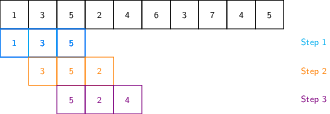

</div>
</center>

*  **Exponential Moving Averages (EMA):** EMA assigns different weights to different time points, allowing the model to give more importance to recent data.

* **Fourier Transforms:** Fourier transforms are useful for capturing periodic patterns in time-series data. We use the Fourier transform to "transform" from time domain to frequency domain (in practice the FFT is utilized).

$$
X(f) = \int_{-\infty}^{\infty} x(t) \, e^{-j2\pi f t} \, dt
$$
*  **Autocorrelation (and Cross-correlation):**
These techniques measure the similarity between a time-series and a lagged version of itself (or another sequence). Autocorrelation Function $r()$ for lag $\tau$:

$$
r_\tau = \frac{\sum_{t=k+1}^{n} (x_t - \bar{x})(x_{t-\tau} - \bar{x})}{\sum_{t=1}^{n} (x_t - \bar{x})^2}
$$


# ⛏ Working with large data in Python


In [14]:
# For static images use inline, for interactive use notebook or widget
%matplotlib inline

# Import required libraries for entire jupyter notebook
from datetime import datetime, timedelta
import h5py
import time
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

In [15]:
nrandom_0 = 500 # Number of random values in first dataset
nrandom_1 = 23 # Number of random values in second dataset

# Create and open hdf5 file
with h5py.File("random_small_file.h5", "w") as file:
    # Create first group"
    group0 = file.create_group("Group0")

    # Create nested group
    group1 = group0.create_group("Group1")

    # Create dataset 'Noise' in group1 and input  random values
    group1["Noise"] = np.random.random_sample(nrandom_0)

    # Create dataset 'EverGrowingData' in group1 with specific properties
    dataset_2 = group1.create_dataset("EverGrowingData", shape=(10,10), maxshape=(None, None))

    # Since maxshape was specified, dataset is resizeable
    dataset_2.resize((nrandom_1, 10))
    # Attempt to resize fixed dataset
    # dataset_1 = group1["Noise"].resize(1000, 5)

    # Input data to resized dataset
    dataset_2[:, 1] = 5 * np.random.random_sample(nrandom_1) - 5

## Read created HDF5 file
As mentioned earlier, hdf5 file acts just like a physical hard-drive. We can read out what is available in what group (folder) in reccurent way. In similar fashion you can step through entire file in your OS.

In [16]:
# Get available groups and datasets
with h5py.File("random_small_file.h5", "r") as file:
    print("Available dataset on root", list(file.keys()))


Available dataset on root ['Group0']


Just like reading out what is in what group, we can read out all properties of stored datasets. These properties are stored in related metadata and therefore its not required to load entire dataset to check for example its shape.

In [17]:
# Get properties of datasets in "/Group0/Group1"
with h5py.File("random_small_file.h5", "r") as file:
    group1 = file["Group0"]["Group1"]
    print(group1)
    for key in group1.keys():
        print(f"Shape of {key} - {group1[key].shape}")

<HDF5 group "/Group0/Group1" (2 members)>
Shape of EverGrowingData - (23, 10)
Shape of Noise - (500,)


In [18]:
# Get data from datasets
with h5py.File("random_small_file.h5", "r") as file:
    group1 = file["/Group0/Group1"]
    sample_data = np.zeros((4, 4))
    sample_data[:, 0] = group1["Noise"][:4]
    print(group1["EverGrowingData"].shape)
    sample_data[:, 1:] = group1["EverGrowingData"][:4, :3]
print(sample_data)

(23, 10)
[[ 0.39539499  0.         -2.48971486  0.        ]
 [ 0.48206789  0.         -1.54672253  0.        ]
 [ 0.01671225  0.         -0.00293749  0.        ]
 [ 0.48958053  0.         -2.23689723  0.        ]]


   <h3>Conclusion</h3>
    <p>Time-series feature engineering is a crucial step in building accurate and robust predictive models for temporal
        data. By leveraging advanced techniques such as time-based features, Fourier transforms, and autocorrelation, we
        can uncover valuable insights and patterns hidden within time-series data.</p>


---



# 🚂 CESNET and 🚢 SUBMERSE SoP data

## Get (real) data

In [19]:
!wget "https://clserver2.cesnet.cz/data1.hdf5" -q -O data1.hdf5
!wget "https://clserver2.cesnet.cz/data2.hdf5" -q -O data2.hdf5
!wget "https://clserver2.cesnet.cz/data3.hdf5" -q -O data3.hdf5
!wget "https://clserver2.cesnet.cz/data4_das.hdf5" -q -O data4_das.hdf5
!wget "https://clserver2.cesnet.cz/data4_sop.hdf5" -q -O data4_sop.hdf5

QR codes for direct download

<table width="100%" border="1">
  <tr>
    <td>
    Data 1

<a href='https://postimg.cc/5YW2Qkjr' target='_blank'><img src='https://i.postimg.cc/5YW2Qkjr/QR-1-1.png' border='0' alt='QR-1-1'/></a>
    </td>
    <td>
Data 2

<a href='https://postimg.cc/sBQMhhmM' target='_blank'><img src='https://i.postimg.cc/sBQMhhmM/QR-2.png' border='0' alt='QR-2'/></a>
    </td>
    <td>
Data 3

<a href='https://postimg.cc/XBVFdvXt' target='_blank'><img src='https://i.postimg.cc/XBVFdvXt/QR-3.png' border='0' alt='QR-3'/></a>
    </td>
    <td>
Data 4 (DAS)

<a href='https://postimg.cc/9zJwsCDF' target='_blank'><img src='https://i.postimg.cc/9zJwsCDF/QR-4.png' border='0' alt='QR-4'/></a>
    </td>
    <td>
Data 5 (DAS)

<a href='https://postimg.cc/XZSr9vzx' target='_blank'><img src='https://i.postimg.cc/XZSr9vzx/QR-5.png' border='0' alt='QR-5'/></a>
    </td>
  </tr>
</table>


## Data and metadata inspection

Lets prepare few function for data exploration. At first we want to see what metedata are stored with datasets:

In [20]:
# printing all attributes for all datasets (on root level for simplicity)
def print_meta(fn):
    with h5py.File(fn, "r") as hf:
      print(f"Keys: {hf.keys()}")
      for k in hf.keys():
          print(hf[k])
          for n, v in hf[k].attrs.items():
              print(f' -> {n} = {v} ({type(v).__name__})')

We continue with short inspection of data in both time and frequency to get some idea what we can expect. Lets create a function which computes spectrum for each channel and plot them on equal intensity scale:

In [21]:
def plot_spec_channels(data, fs, ufcut=200, nperseg=4096):
  sides = []
  Sxxs = []
  fig, axs = plt.subplots(1, data.shape[1], figsize=(17, 3), sharey=True)
  # compute spectrogram for each channel
  for i in range(data.shape[1]):
    f, t, Sxx = signal.spectrogram(data[:, i], fs, window=('tukey', 0.25), nperseg=nperseg, mode='psd', return_onesided=True, noverlap=0, )
    fidx = np.abs(f-ufcut).argmin()
    Sxx = Sxx[0:fidx, :]
    Sxxs.append(Sxx)
    sides.append(Sxx.sum(axis=1))

  # equalize intensity limits between all channels
  vmin = 10 * np.log10(np.min(Sxxs))
  vmax = 10 * np.log10(np.max(Sxxs))

  # plot spectrogram for each channel
  for i in range(data.shape[1]):
    axs[i].pcolormesh(10 * np.log10(Sxxs[i][0:fidx, :]), vmin=vmin, vmax=vmax)
    axs[i].set_title(f"Channel {i}")
    axs[i].set_xlabel("sample")

  # set ticks and labels
  axs[0].set_yticks(np.linspace(0, fidx, 10))
  axs[0].set_yticklabels([f'{x:.1f}' for x in np.linspace(0, ufcut, 10)])
  axs[0].set_ylabel("Frequency [Hz]")
  plt.show()

  # plot sideview
  fig, ax = plt.subplots(figsize=(10, 5))
  for i, ch in enumerate(sides):
    ax.plot(10 * np.log10(ch), label=f'Channel {i}')
  ax.legend()
  ax.set_title("Spectrum line sum - sideview")
  ax.set_xticks(np.linspace(0, fidx, 10))
  ax.set_xticklabels([f'{x:.1f}' for x in np.linspace(0, ufcut, 10)])
  ax.set_xlabel("Frequency [Hz]")
  ax.set_ylabel("Intensity [dB]")
  plt.show()

  return Sxxs

### Brief overview with channel inspection

Each dataset is read from file, we show a known metadata, plot data in timedomain and plot spectrum for each channel.

#### Dataset 1

This dataset contains 120 s of unknown signal with 1 short and intense event (probably some knock on patchcord) and in some part there is o significantly lower background noise (unknown origin).

Keys: <KeysViewHDF5 ['arr']>
<HDF5 dataset "arr": shape (2400000, 4), type "<f4">
 -> creator = senzotools (str)
 -> description = start 2023-06-22 23-20-47 (str)
 -> timestamp_written = 2023-06-23 18:59:51.365603 (str)
--------------------------------------------------------------------------------
{'creator': 'senzotools', 'description': 'start 2023-06-22 23-20-47', 'timestamp_written': '2023-06-23 18:59:51.365603'}
(2400000, 4)


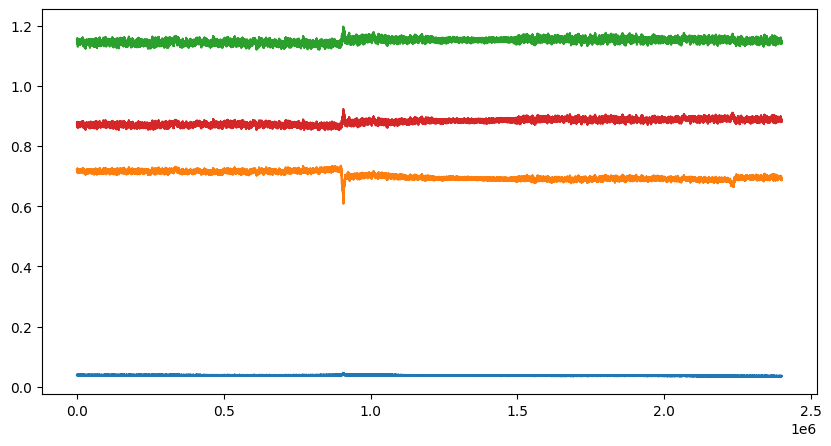

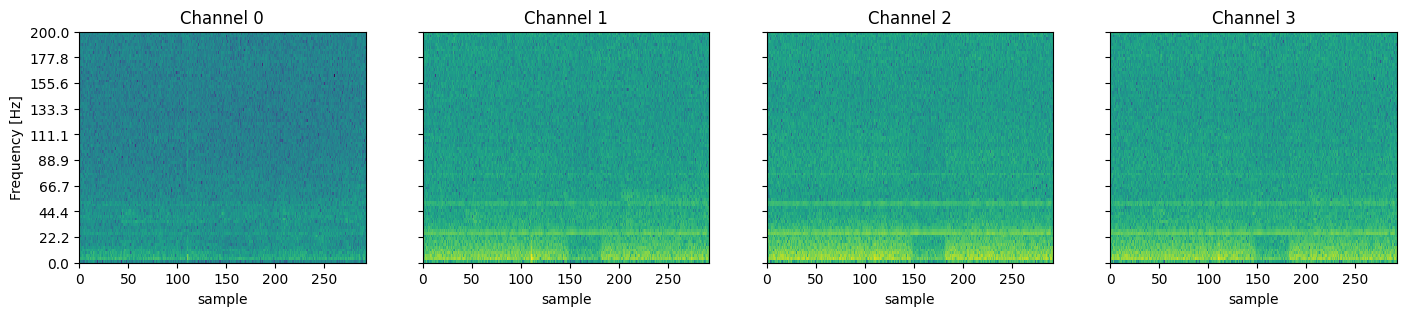

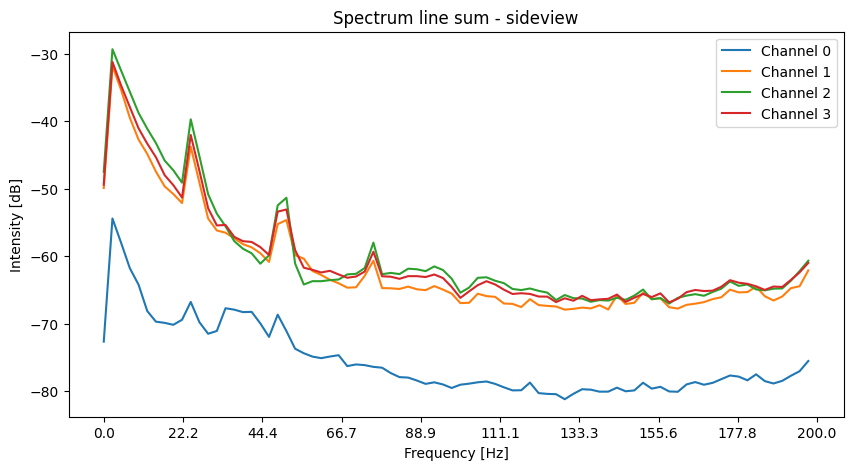

In [26]:
print_meta('data1.hdf5'), print('-' * 80)

data1 = h5py.File("data1.hdf5", "r")['arr']
meta1 = dict(data1.attrs)
print(meta1)
print(data1.shape)
meta1['sampling_frequency'] = 20000  # this value is missing in given dataset
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data1)
plt.show()
Sxxs = plot_spec_channels(data1, meta1['sampling_frequency'], ufcut=200, nperseg=2*4096)

#### Dataset 2

This dataset contains 100 s of signal where artificial event were induced by a loudspeaker diaphragm to which the patchcord was mounted.

We introduced pulses of discrete frequencies of 10, 20, 30, 40, 50, 75, 100, 200, and 500 Hz interleaved by a 3-s long silence. After that, we introduced 5-s long `heartbeat` signals that consisted of repeated pairs of two signals
with 100% and 20% of loudspeaker amplitude, respectively.

There is also visible some noise in neigborhood of 50 Hz (and its harmonic ~100 Hz, ~150 Hz) probably induced from power grid.

Keys: <KeysViewHDF5 ['arr']>
<HDF5 dataset "arr": shape (2000000, 4), type "<f4">
 -> channels = 4 (int64)
 -> creator = polrecord2 (str)
 -> description = Different frequency disturbances induced by repro/speaker. (str)
 -> duration = 100.0 (float64)
 -> epoch_start = 1562763748 (int64)
 -> epoch_written = 1727092872 (int64)
 -> samples = 2000000 (int64)
 -> sampling_frequency = 20000 (int64)
 -> timestamp_start = 2019-07-10 15:02:28 (str)
 -> timestamp_written = 2024-09-23 14:01:12.941366 (str)
--------------------------------------------------------------------------------
{'channels': np.int64(4), 'creator': 'polrecord2', 'description': 'Different frequency disturbances induced by repro/speaker.', 'duration': np.float64(100.0), 'epoch_start': np.int64(1562763748), 'epoch_written': np.int64(1727092872), 'samples': np.int64(2000000), 'sampling_frequency': np.int64(20000), 'timestamp_start': '2019-07-10 15:02:28', 'timestamp_written': '2024-09-23 14:01:12.941366'}
(2000000, 4)


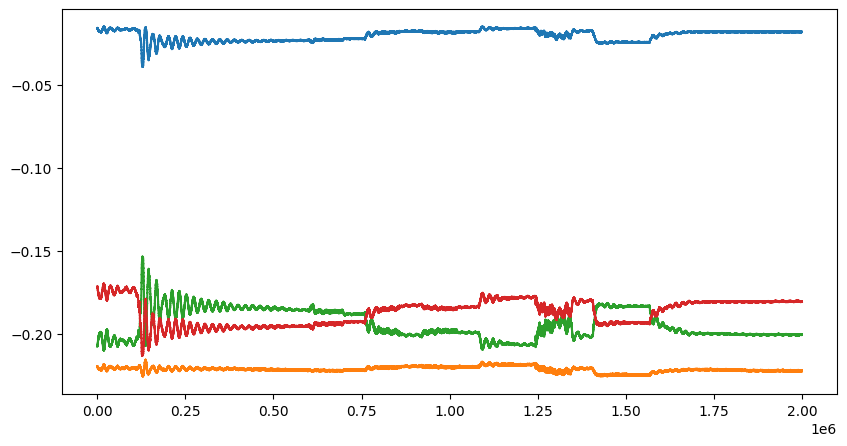

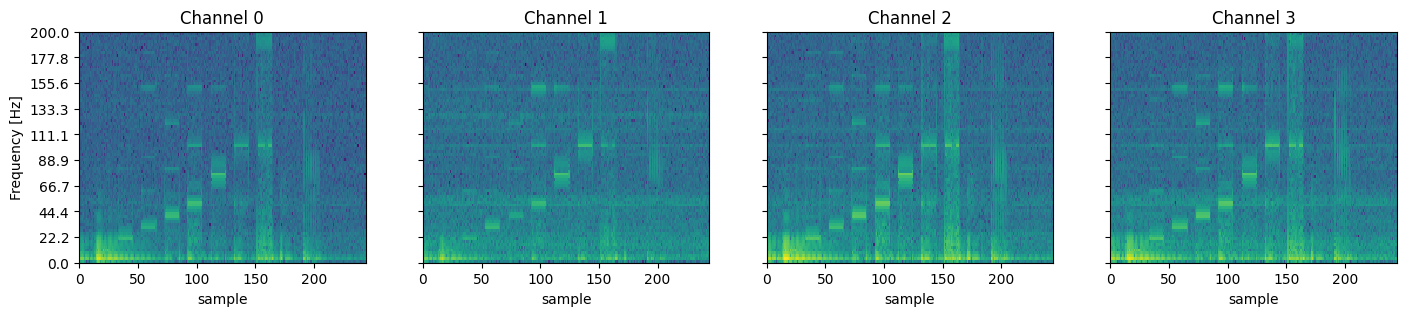

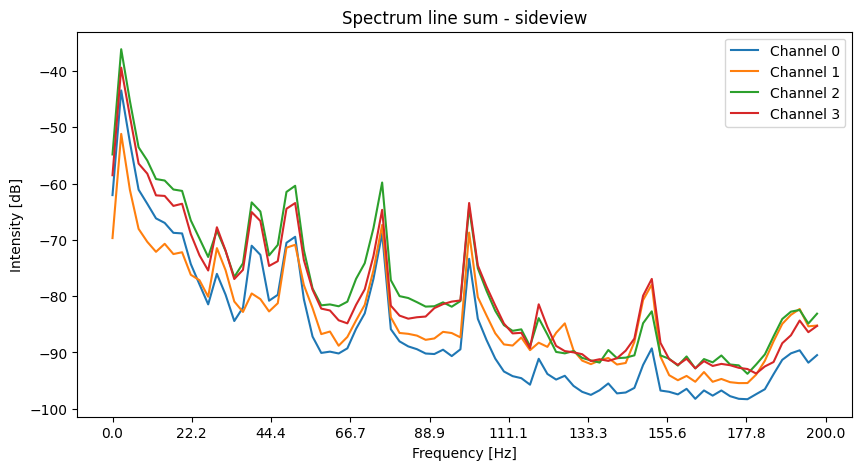

In [ ]:
print_meta('data2.hdf5'), print('-' * 80)
data2 = h5py.File("data2.hdf5", "r")['arr']
meta2 = dict(data2.attrs)
print(meta2)
print(data2.shape)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data2)
plt.show()
Sxxs = plot_spec_channels(data2, meta2['sampling_frequency'], ufcut=200, nperseg=2*4096)

#### Dataset 3

This dataset contains 60 s of signal where are the footprints of rack door closing and openning (repeated 6 times).

Keys: <KeysViewHDF5 ['arr']>
<HDF5 dataset "arr": shape (1200000, 4), type "<f4">
 -> channels = 4 (int64)
 -> creator = npz2hdf5 utility (str)
 -> description = Rack door open and close ~ 6 times. (str)
 -> duration = 60.0 (float64)
 -> epoch_start = 1638177784 (int64)
 -> epoch_written = 1727093552 (int64)
 -> samples = 1200000 (int64)
 -> sampling_frequency = 20000 (int64)
 -> timestamp_start = 2021-11-29 10:23:04 (str)
 -> timestamp_written = 2024-09-23 14:12:32.411591 (str)
--------------------------------------------------------------------------------
{'channels': np.int64(4), 'creator': 'npz2hdf5 utility', 'description': 'Rack door open and close ~ 6 times.', 'duration': np.float64(60.0), 'epoch_start': np.int64(1638177784), 'epoch_written': np.int64(1727093552), 'samples': np.int64(1200000), 'sampling_frequency': np.int64(20000), 'timestamp_start': '2021-11-29 10:23:04', 'timestamp_written': '2024-09-23 14:12:32.411591'}
(1200000, 4)


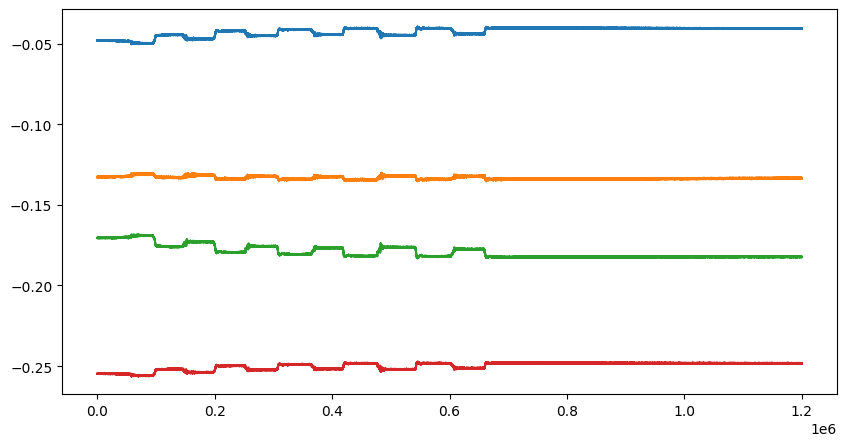

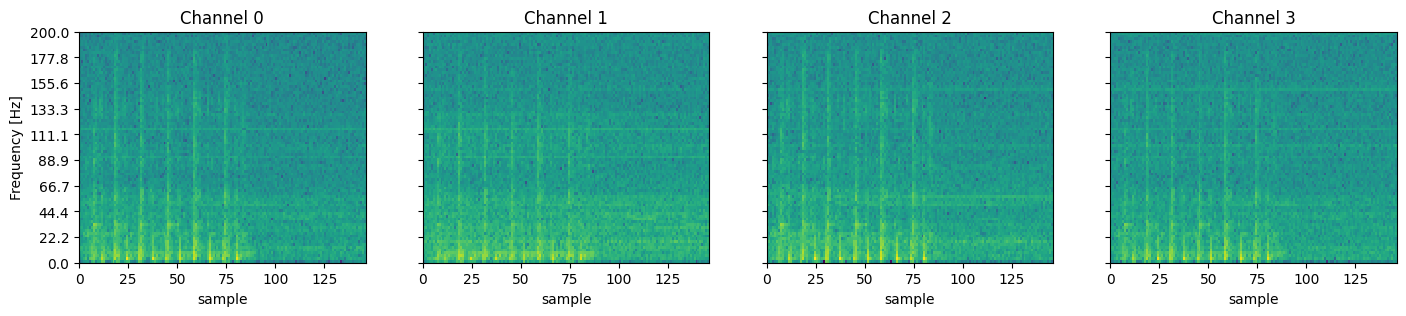

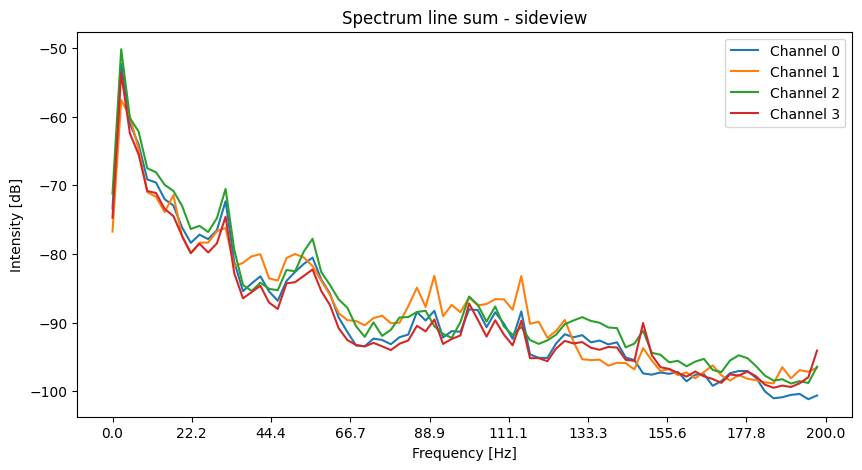

In [ ]:
print_meta('data3.hdf5'), print('-' * 80)
data3 = h5py.File("data3.hdf5", "r")['arr']
meta3 = dict(data3.attrs)
print(meta3)
print(data3.shape)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data3)
plt.show()
Sxxs = plot_spec_channels(data3, meta3['sampling_frequency'], ufcut=200, nperseg=2*4096)

# 💪 Practical tasks

## 🔍 Finding event properties on dataset 1

Dataset 1 contains trace of short intensive event. Lets investigate that trace...

In [ ]:
data1 = h5py.File("data1.hdf5", "r")['arr']
meta1 = dict(data1.attrs)
print(meta1)
print(data1.shape)
meta1['sampling_frequency'] = 20000  # this value is missing in given dataset


{'creator': 'senzotools', 'description': 'start 2023-06-22 23-20-47', 'timestamp_written': '2023-06-23 18:59:51.365603'}
(2400000, 4)


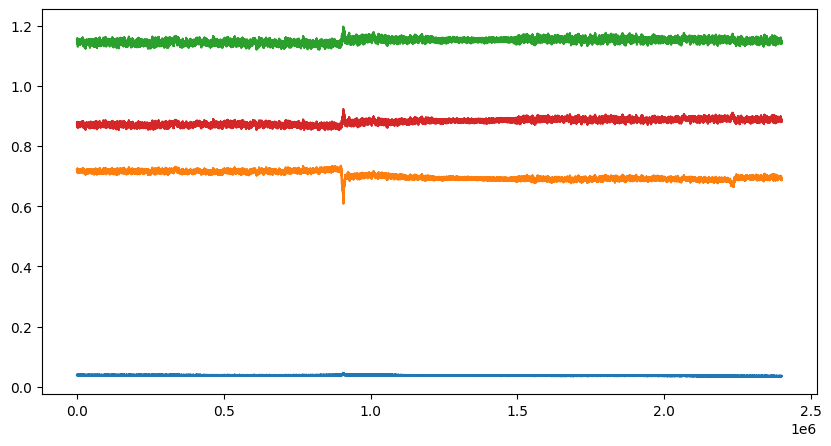

In [ ]:
# lets see whole dataset in timedomain
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data1)
plt.show()

It is obvious that event has different size of trace in each channel. The maximal amplitude seems to be on orange channel (idx==1).

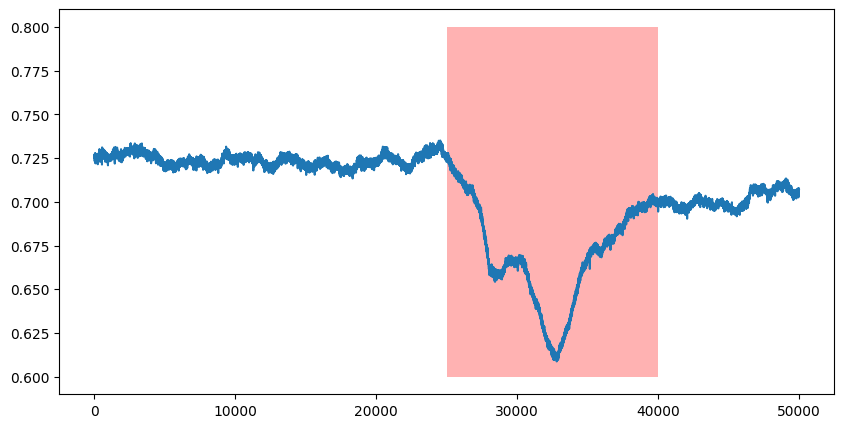

event duration = 0.75 s
event amplitude diff = 1.160 (28.3 % of Polarilog AD range)


In [ ]:
# lets show the part tight around the event trace
fig, ax = plt.subplots(figsize=(10, 5))
data_zoom = data1[875000:925000, :]
ax.plot(data_zoom[:, 1])

# mark desired trace
x_start = 25000
x_end = 40000
rect = plt.Rectangle((25000, 0.6), x_end - x_start, 0.2, facecolor="red", alpha=0.3)
ax.add_patch(rect)
plt.show()

# calculate duration and amplitude difference
fs = 20000
dur = (x_end - x_start) / fs
event_max = data_zoom[x_start:x_end, :].max()
event_min = data_zoom[x_start:x_end, :].min()
amp = event_max - event_min
print(f'event duration = {dur} s')
print(f'event amplitude diff = {amp:.3f} ({amp/4.096*100:.1f} % of Polarilog AD range)')

In [ ]:
# lets compare the trace intensity in all channels, based on given time range
for c in range(0, 4):
  amp = data_zoom[x_start:x_end, c].max() - data_zoom[x_start:x_end, c].min()
  print(f'CH{c} event amplitude diff = {amp:.3f} ({amp/4.096*100:.1f} % of Polarilog AD range)')

CH0 event amplitude diff = 0.008 (0.2 % of Polarilog AD range)
CH1 event amplitude diff = 0.119 (2.9 % of Polarilog AD range)
CH2 event amplitude diff = 0.063 (1.5 % of Polarilog AD range)
CH3 event amplitude diff = 0.062 (1.5 % of Polarilog AD range)


**Take away**: Channel matters. This can be used as a feature for event classification (some events manifest themselves only in some channels).

## 🚪 Autocorelation on dataset 3 (rack door closing)

### Autocorrelation
[Autocorrelation](https://www.investopedia.com/terms/a/autocorrelation.asp) is a mathematical representation of the degree of similarity between a given time series and a lagged version of itself over successive time intervals <a href="https://www.investopedia.com/terms/a/autocorrelation.asp">[5]</a>.

<b>KEY TAKEAWAYS:</b>
- Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.
- Autocorrelation measures the relationship between a variable's current value and its past values.
- An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of negative 1 represents a perfect negative correlation.


The dataset contains traces of periodical event (rack closing) repeated 6 times. The long term level of the signal is not exactly same probably because the laser source is not so stable. Therefore we want to remove that trend in data.

In [27]:
def detrend(data, block_size=100):
    points = np.arange(0, data.shape[0], block_size)
    return signal.detrend(data, axis=0, type='linear', bp=points)  # type: linear / constant

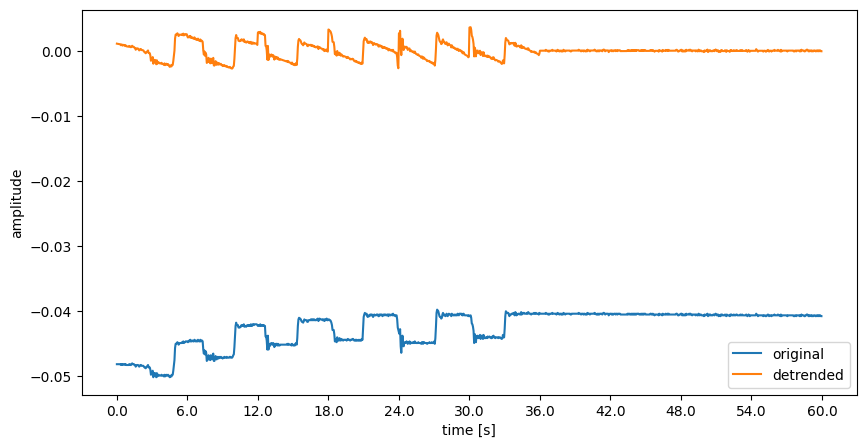

In [28]:
data = h5py.File("data3.hdf5", "r")['arr']
meta = dict(data.attrs)
channel = 0
# block size is important parameter of detrending procedure, try to adjust that value to 1/5 or 1/50 of block size
data_det = detrend(data[:, channel], block_size=data.shape[0]//10)

plt.figure(figsize=(10, 5))
plt.plot(data[::1000, channel], label="original")
plt.plot(data_det[::1000], label="detrended")
xticks = np.linspace(0, 1200, 11, endpoint=True)
xlabels = [f'{x/20:.1f}' for x in xticks]
plt.xticks(xticks, xlabels)
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.legend()
plt.show()

Autocorrelation shape = (600, 1)
Autocorrelation shape = (600,)


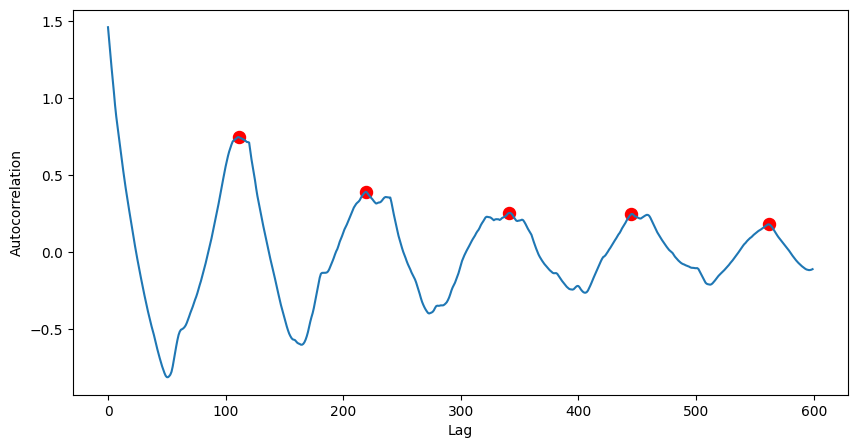

Estimated event duration: 5.55 seconds (0th peak at 111)
peak[111] = 5.5500 s
peak[219] = 10.9500 s
peak[341] = 17.0500 s
peak[445] = 22.2500 s
peak[562] = 28.1000 s
Probable lenght of periodical event = 5.64 s (based on average shift between peaks value)


In [33]:
# Calculate autocorrelation for different shifts with step of 1000 (0.05 s)
autocorr = []
for i in range(0, data_det.shape[0] // 2, 1000):
  autocorr.append(np.correlate(data_det, np.roll(data_det, i)))

print(f'Autocorrelation shape = {np.array(autocorr).shape}')
autocorr = np.array(autocorr).ravel() # remove dimension 2D (N,1) -> 1D array (N,)
print(f'Autocorrelation shape = {autocorr.shape}')

# Find peaks in the autocorrelation (look for which offsets the shifted data match its not-shifted version best)
peaks, _ = signal.find_peaks(autocorr, height=0.1, prominence=0.2)

plt.figure(figsize=(10, 5))
plt.plot(autocorr)
plt.scatter(peaks, autocorr[peaks], marker='o', color='red', s=75)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Assuming the first peak corresponds to the event duration
if len(peaks) > 0:
    c = meta['sampling_frequency'] / 1000  # each autocorrelation step represents 1000 samples in data
    event_duration = peaks[0] / c
    print(f"Estimated event duration: {event_duration:.2f} seconds (0th peak at {peaks[0]})")
    for p in peaks:
      print(f"peak[{p}] = {p/c:.4f} s")
    avg = np.average(np.diff(peaks))
    print(f'Probable lenght of periodical event = {avg/c:.2f} s (based on average shift between peaks value)')
else:
    print("No significant peaks found in autocorrelation.")


## 🌋 Aligning SOP and DAS data

Lets plot one small earthquake recorded by DAS acquired on submarine cable between Ny-Alesund and Longyearbyen on 2024-11-20 14:40. The original data recorded by DAS are 2D array where Y axis represent time (running down) and X axis represents distance from interrogator.

For our purpose (clearer comparison with what we already seen), the data were transposed in such way that axis are switched, and X stands for time (running right) and Y for distance.

Plot them...

(2094, 6040)


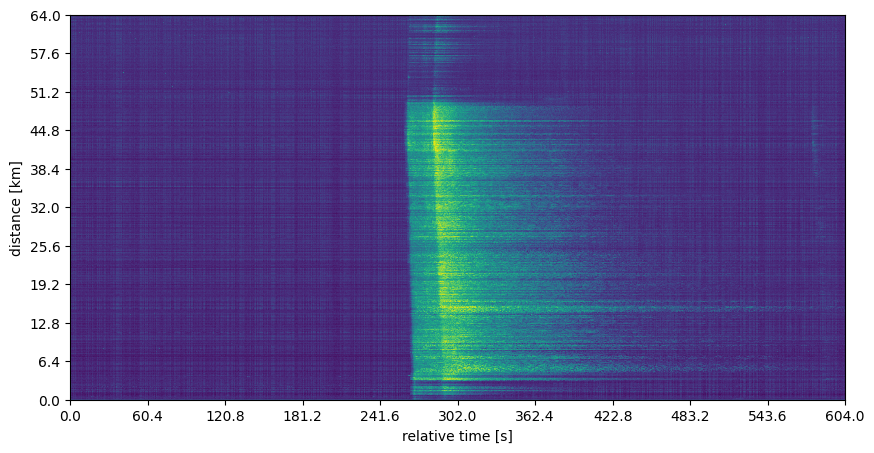

Absolute start time = 2024-11-20 14:40:00


In [34]:
datadas = h5py.File("data4_das.hdf5", "r")['arr']
metadas = dict(datadas.attrs)
print(datadas.shape)
fs = metadas['sampling_frequency']
distance_coeff = 0.030563514804 # OptoDAS measuring distance is 64 km (map 2094 samples to 64 km)

fig, ax = plt.subplots(figsize=(10, 5))
ax.pcolormesh(datadas[:, :])
xticks = np.linspace(0, datadas.shape[1], 11, endpoint=True)
ax.set_xticks(xticks, [f'{x/fs:.1f}' for x in xticks])
yticks = np.linspace(0, datadas.shape[0], 11, endpoint=True)
ax.set_yticks(yticks, [f'{x * distance_coeff:.1f}' for x in yticks])
ax.set_xlabel("relative time [s]")
ax.set_ylabel("distance [km]")
plt.show()

st_das = datetime.fromtimestamp(metadas['epoch_start'])
print(f'Absolute start time = {st_das}')


Now it is time to display SOP data covering the same time period of time

Original SOP data shape = (144006912, 4)
Absolute start time of SOP data = 2024-11-20 13:45:29
Offset between SOP and DAS block start = 0:54:31 (3271 s)
Cropped SOP data shape = (12080000, 4)
New absolute start time = 2024-11-20 14:40:00


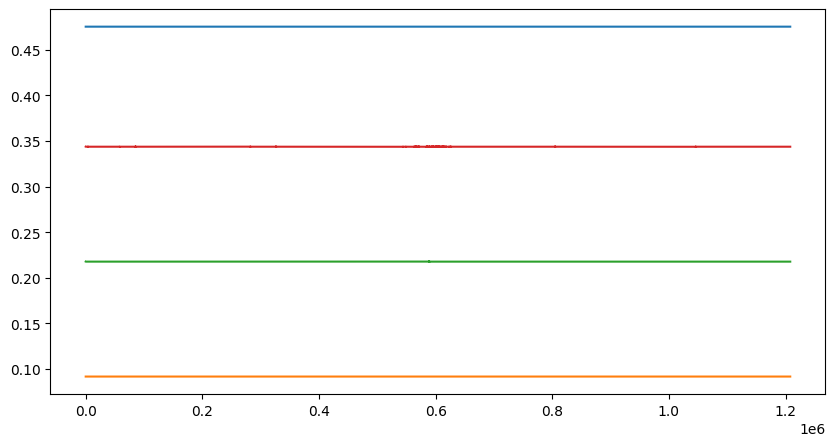

In [35]:
data4 = h5py.File("data4_sop.hdf5", "r")['arr']
meta4 = dict(data4.attrs)
meta4['sampling_frequency'] = 20000  # this value is missing in given dataset
print(f'Original SOP data shape = {data4.shape}')

st_sop = datetime.fromtimestamp(meta4['epoch_start'])
print(f'Absolute start time of SOP data = {st_sop}')
offset = st_das - st_sop
print(f'Offset between SOP and DAS block start = {offset} ({offset.seconds} s)')

# crop SOP data by offset from start to align them and make same length...
a = offset.seconds * meta4['sampling_frequency']
b = int(offset.seconds + float(metadas['duration'])) * meta4['sampling_frequency']
data4 = data4[a:b]
print(f'Cropped SOP data shape = {data4.shape}')
st_sop = datetime.fromtimestamp(meta4['epoch_start']) + offset
print(f'New absolute start time = {st_sop}')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data4[::10, :]) # a little decimation for faster plot
plt.show()

Not optimistic, nearly nothing to see expect small noise on red (id==3) channel, may the spectrogram be more suitable:

(20001, 302)


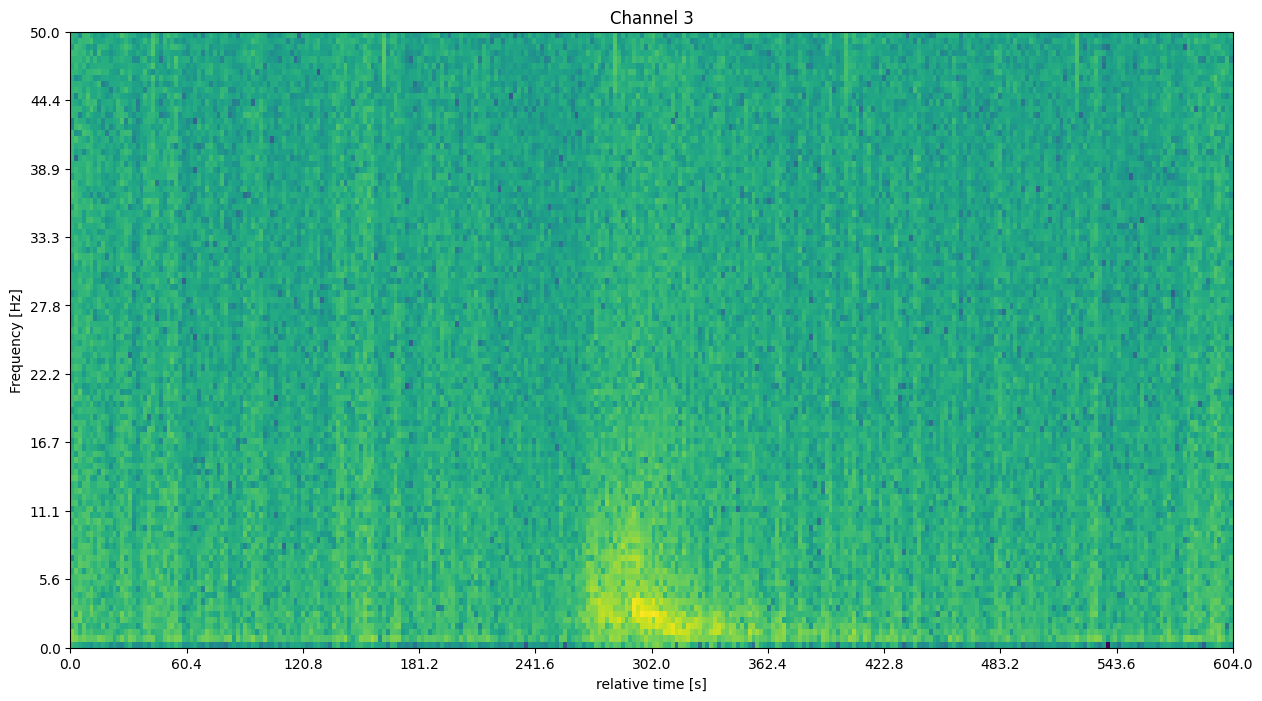

In [36]:
ufcut = 50 # Hz
nperseg = 40000 # Hz
channel = 3
fig = plt.figure(figsize=(15, 8))

ax = plt.gca()
f, t, Sxx = signal.spectrogram(data4[:, channel], meta4['sampling_frequency'], window=('tukey', 0.25), nperseg=nperseg, mode='psd', return_onesided=True, noverlap=0)
print(Sxx.shape)
fidx = np.abs(f - ufcut).argmin()
Sxx = Sxx[0:fidx, :]

# plot spectrogram for selected channel
ax.pcolormesh(10 * np.log10(Sxx))
ax.set_title(f"Channel {channel}")

# set ticks and labels
xticks = np.linspace(0, Sxx.shape[1], 11, endpoint=True)
c = (nperseg / meta4['sampling_frequency'])
ax.set_xticks(xticks, [f'{(x * c):.1f}' for x in xticks])
ax.set_xlabel("relative time [s]")
ax.set_yticks(np.linspace(0, fidx, 10))
ax.set_yticklabels([f'{x:.1f}' for x in np.linspace(0, ufcut, 10)])
ax.set_ylabel("Frequency [Hz]")
plt.show()


Whoa! Also SOP is capable to catch the earthquake!

Lets plot them together...

(2094, 6040)
(100, 302)


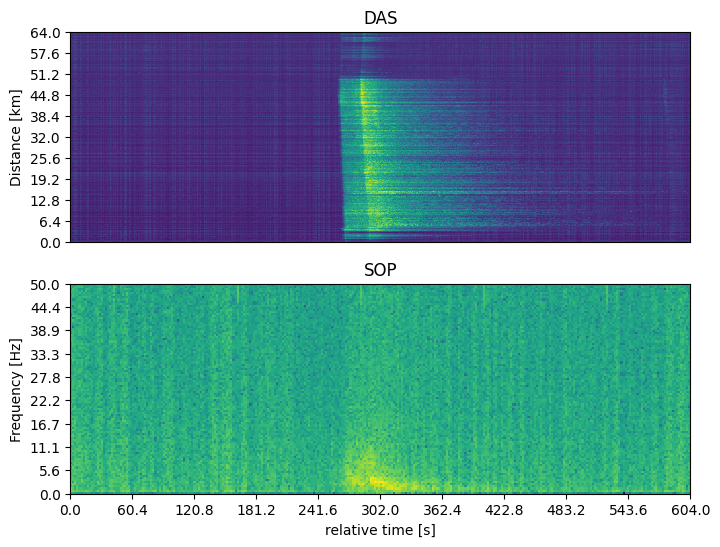

In [ ]:
print(datadas.shape)
print(Sxx.shape)

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].pcolormesh(datadas[:, :])
axs[0].set_title("DAS")
axs[0].set_xticks([])
yticks = np.linspace(0, datadas.shape[0], 11, endpoint=True)
axs[0].set_yticks(yticks, [f'{x * distance_coeff:.1f}' for x in yticks])
axs[0].set_ylabel("Distance [km]")

axs[1].pcolormesh(10 * np.log10(Sxx))
axs[1].set_title("SOP")
xticks = np.linspace(0, Sxx.shape[1], 11, endpoint=True)
axs[1].set_xticks(xticks, [f'{x * 2:.1f}' for x in xticks])
axs[1].set_xlabel("relative time [s]")
axs[1].set_yticks(np.linspace(0, fidx, 10))
axs[1].set_yticklabels([f'{x:.1f}' for x in np.linspace(0, ufcut, 10)])
axs[1].set_ylabel("Frequency [Hz]")

plt.show()